=== Información del Dataset ===
Filas: 45211, Columnas: 17

Primeras 5 filas:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

=== Estadísticas Descriptivas ==

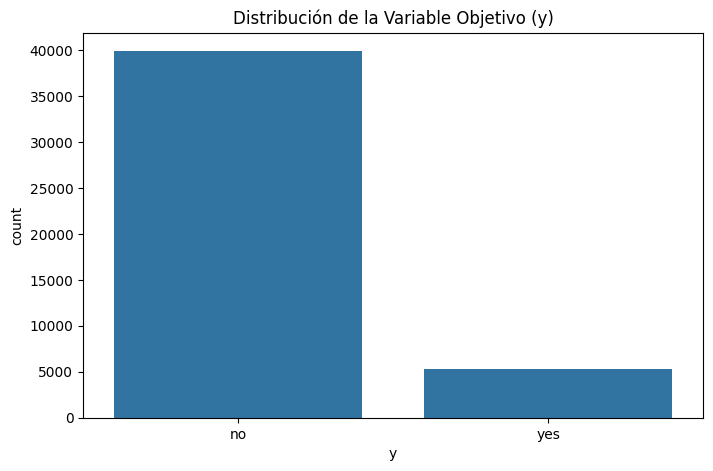

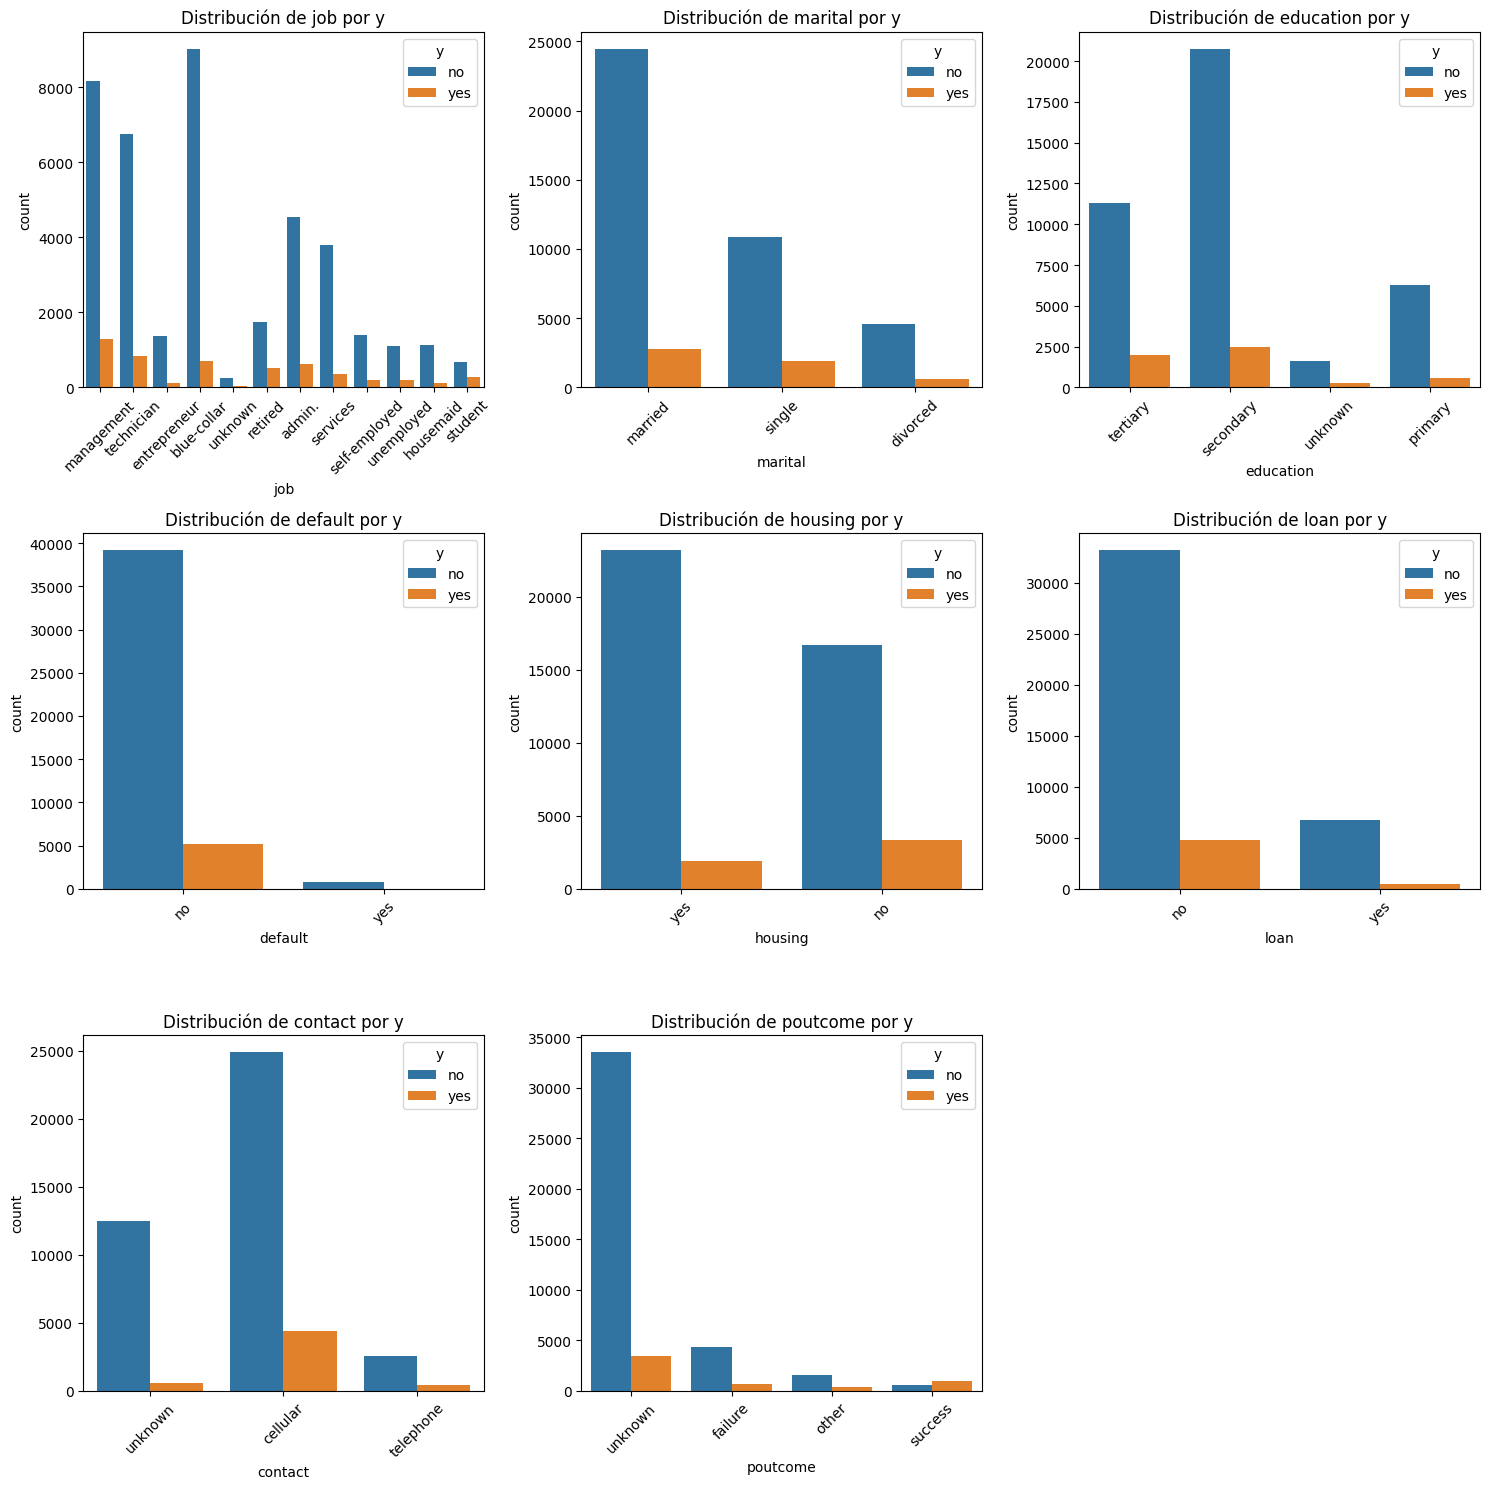

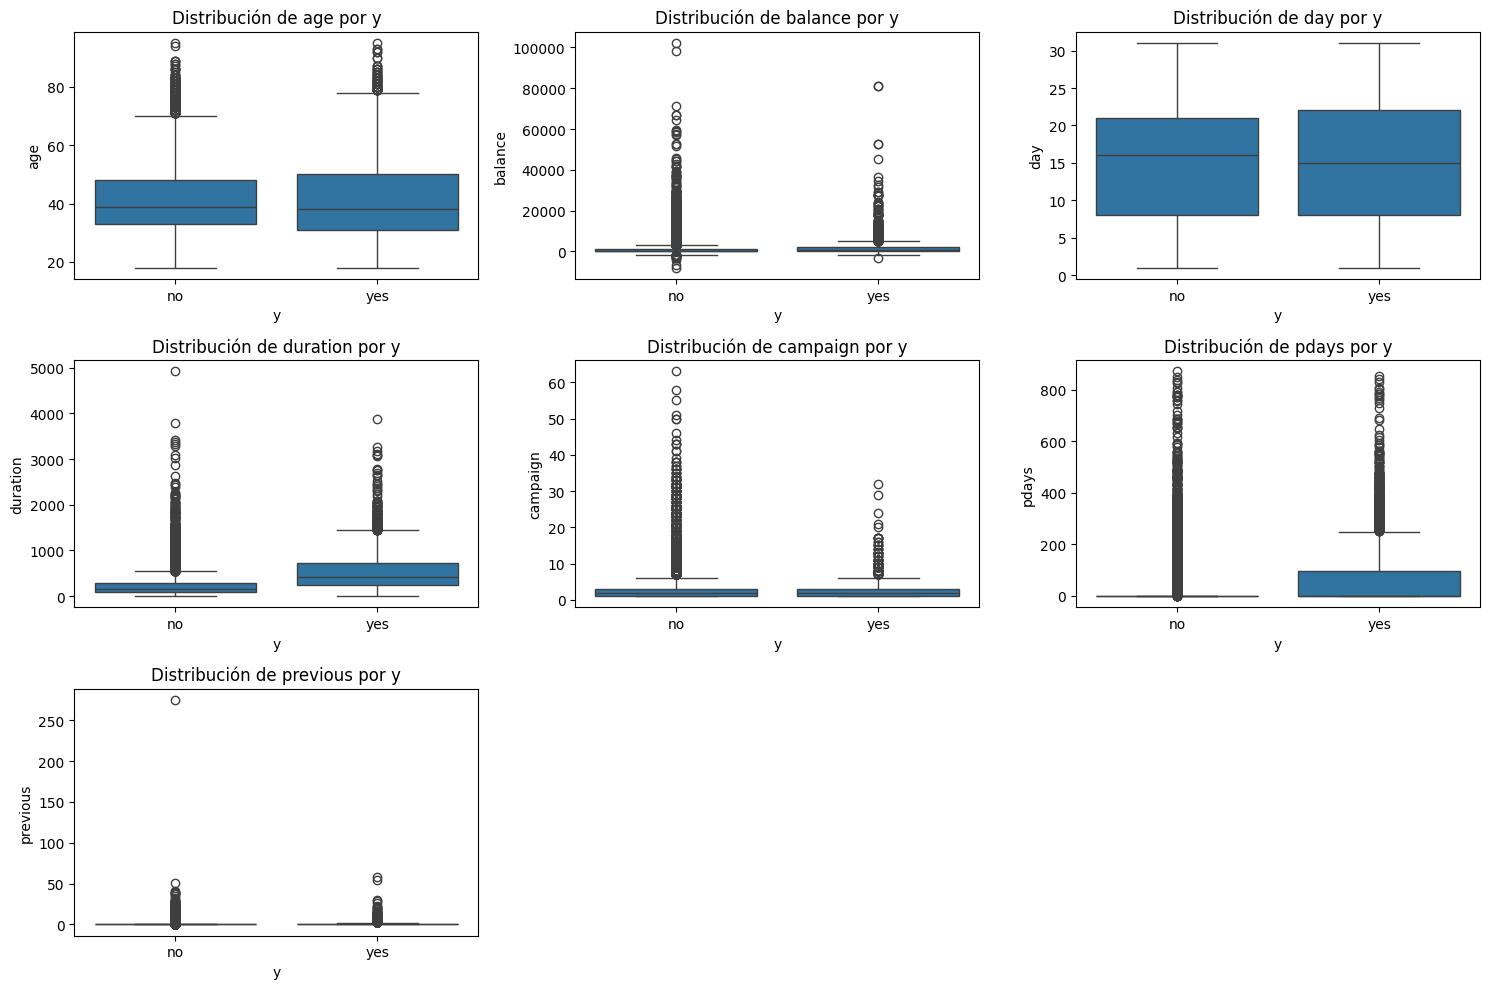

In [1]:
# Importación de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_imb_pipeline

# Cargar el dataset
df = pd.read_excel('bank-full.xlsx')

# Información básica
print("=== Información del Dataset ===")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
print("\nPrimeras 5 filas:")
print(df.head())

# Estadísticas descriptivas
print("\n=== Estadísticas Descriptivas ===")
print(df.describe(include='all'))

# Distribución de la variable objetivo
print("\n=== Distribución de la Variable Objetivo 'y' ===")
print(df['y'].value_counts(normalize=True))

# Visualización de la distribución
plt.figure(figsize=(8, 5))
sns.countplot(x='y', data=df)
plt.title('Distribución de la Variable Objetivo (y)')
plt.savefig('distribucion_y.png')
plt.show()

# Análisis de variables categóricas
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
plt.figure(figsize=(15, 15))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue='y', data=df)
    plt.xticks(rotation=45)
    plt.title(f'Distribución de {col} por y')
plt.tight_layout()
plt.savefig('distribucion_categoricas.png')
plt.show()

# Análisis de variables numéricas
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f'Distribución de {col} por y')
plt.tight_layout()
plt.savefig('distribucion_numericas.png')
plt.show()

In [2]:
# Preprocesamiento
# Definir variables categóricas y numéricas
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Transformaciones
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)])

# Dividir datos
X = df.drop('y', axis=1)
y = df['y'].map({'yes': 1, 'no': 0})  # Convertir a binario

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Manejo de desbalanceo de clases
smote = SMOTE(random_state=42)

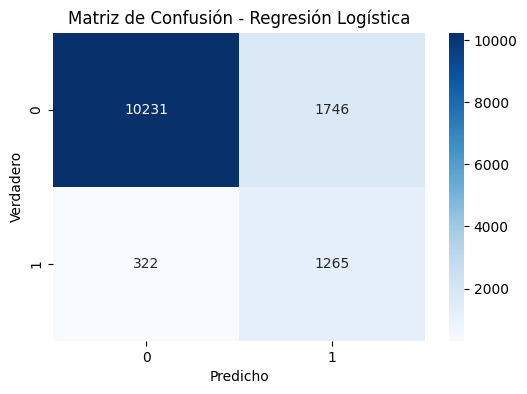


=== Regresión Logística ===
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     11977
           1       0.42      0.80      0.55      1587

    accuracy                           0.85     13564
   macro avg       0.69      0.83      0.73     13564
weighted avg       0.91      0.85      0.87     13564



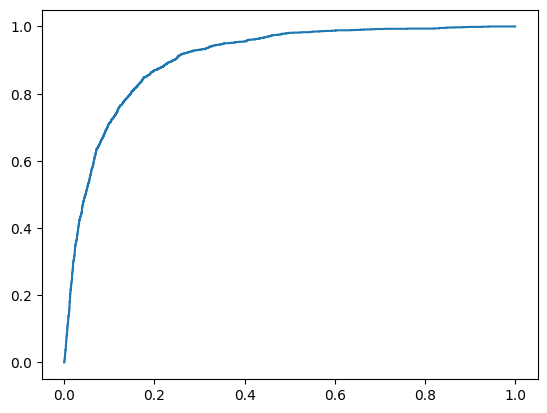

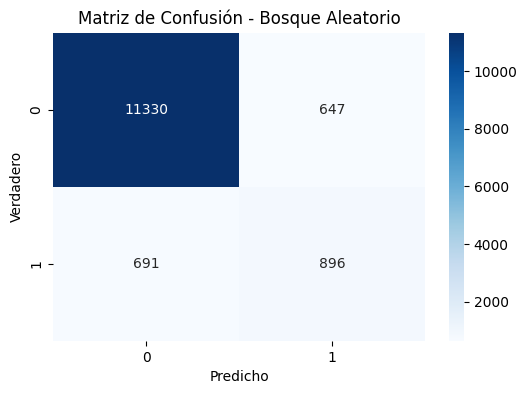


=== Bosque Aleatorio ===
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     11977
           1       0.58      0.56      0.57      1587

    accuracy                           0.90     13564
   macro avg       0.76      0.76      0.76     13564
weighted avg       0.90      0.90      0.90     13564



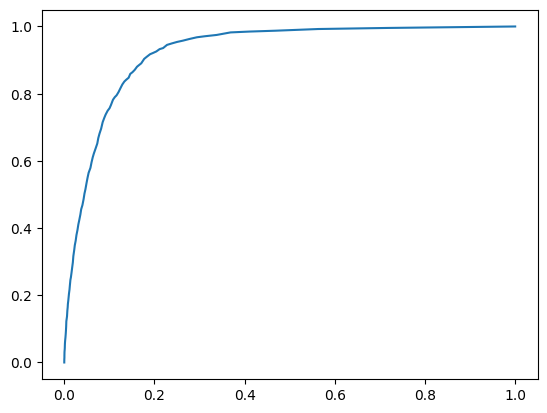

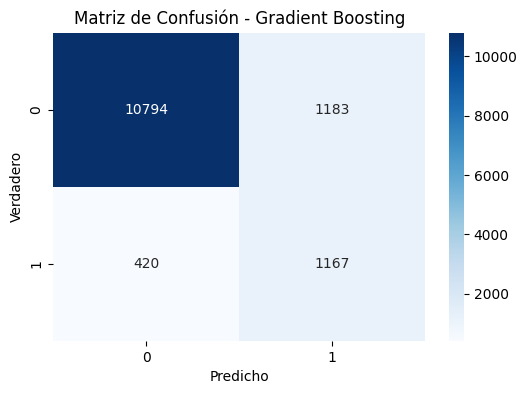


=== Gradient Boosting ===
              precision    recall  f1-score   support

           0       0.96      0.90      0.93     11977
           1       0.50      0.74      0.59      1587

    accuracy                           0.88     13564
   macro avg       0.73      0.82      0.76     13564
weighted avg       0.91      0.88      0.89     13564



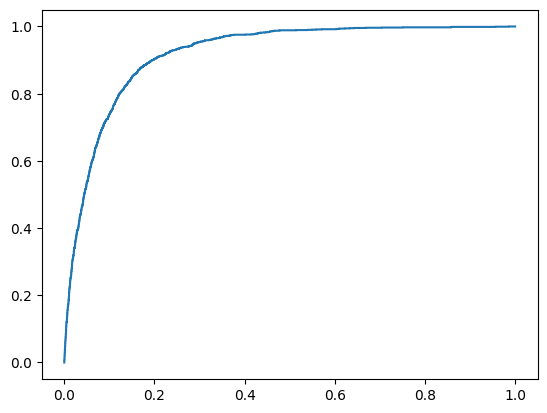

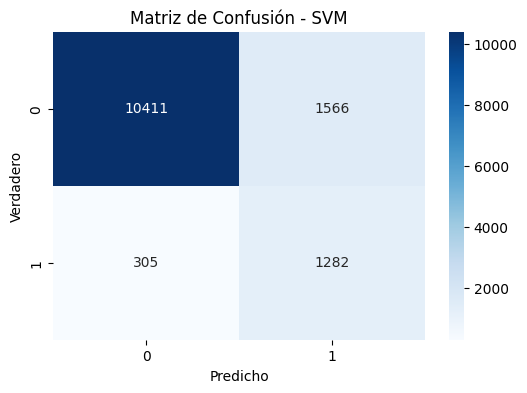


=== SVM ===
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     11977
           1       0.45      0.81      0.58      1587

    accuracy                           0.86     13564
   macro avg       0.71      0.84      0.75     13564
weighted avg       0.91      0.86      0.88     13564



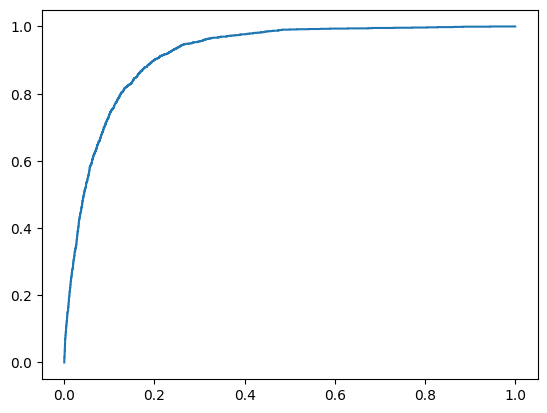

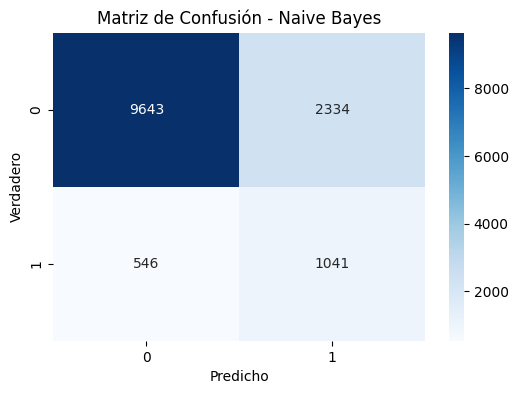


=== Naive Bayes ===
              precision    recall  f1-score   support

           0       0.95      0.81      0.87     11977
           1       0.31      0.66      0.42      1587

    accuracy                           0.79     13564
   macro avg       0.63      0.73      0.64     13564
weighted avg       0.87      0.79      0.82     13564



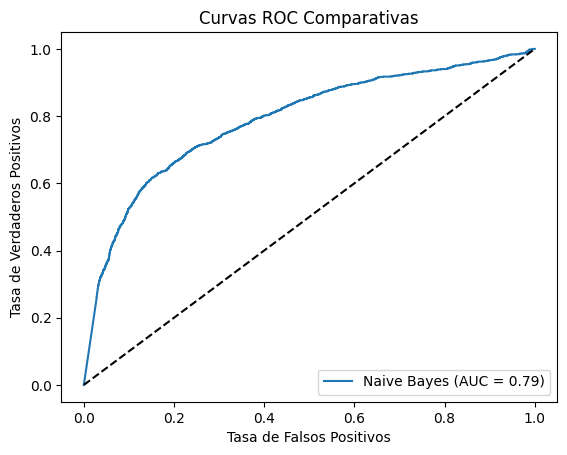

In [3]:
# Definición de modelos
models = {
    "Regresión Logística": LogisticRegression(max_iter=1000, random_state=42),
    "Bosque Aleatorio": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Naive Bayes": GaussianNB()
}

# Entrenamiento y evaluación
results = {}
for name, model in models.items():
    # Crear pipeline con SMOTE
    pipeline = make_imb_pipeline(
        preprocessor,
        smote,
        model
    )

    # Entrenamiento
    pipeline.fit(X_train, y_train)

    # Predicciones
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    # Métricas
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba),
        'CV Score (F1)': np.mean(cross_val_score(pipeline, X_train, y_train,
                                              scoring='f1', cv=3))
    }

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {name}')
    plt.ylabel('Verdadero')
    plt.xlabel('Predicho')
    plt.savefig(f'matriz_confusion_{name.lower().replace(" ", "_")}.png')
    plt.show()

    # Reporte de clasificación
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {results[name]["ROC AUC"]:.2f})')

# Gráfico de curvas ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC Comparativas')
plt.legend(loc='lower right')
plt.savefig('curvas_roc.png')
plt.show()


=== Comparación de Modelos ===
                     Accuracy  Precision    Recall        F1   ROC AUC  \
Gradient Boosting    0.881820   0.496596  0.735350  0.592837  0.919232   
SVM                  0.862061   0.450140  0.807813  0.578129  0.918666   
Bosque Aleatorio     0.901357   0.580687  0.564587  0.572524  0.924779   
Regresión Logística  0.847538   0.420126  0.797101  0.550239  0.905398   
Naive Bayes          0.787673   0.308444  0.655955  0.419589  0.789407   

                     CV Score (F1)  
Gradient Boosting         0.589221  
SVM                       0.583788  
Bosque Aleatorio          0.553073  
Regresión Logística       0.554025  
Naive Bayes               0.413858  


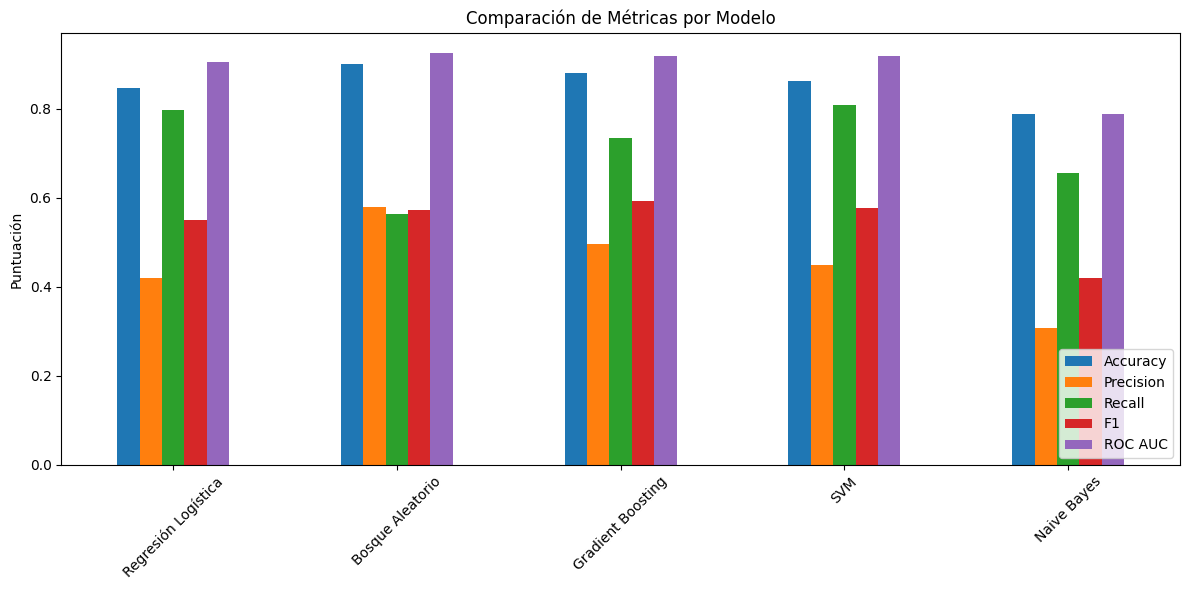


=== Mejores Parámetros ===
{'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__max_depth': 5, 'gradientboostingclassifier__n_estimators': 100}

=== Mejor Modelo (Optimizado) ===
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     11977
           1       0.55      0.69      0.61      1587

    accuracy                           0.90     13564
   macro avg       0.75      0.81      0.78     13564
weighted avg       0.91      0.90      0.90     13564



In [4]:
# Resultados comparativos
results_df = pd.DataFrame(results).T
print("\n=== Comparación de Modelos ===")
print(results_df.sort_values(by='F1', ascending=False))

# Gráfico de comparación
metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC']
results_df[metrics].plot(kind='bar', figsize=(12, 6))
plt.title('Comparación de Métricas por Modelo')
plt.ylabel('Puntuación')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('comparacion_modelos.png')
plt.show()

# Optimización del mejor modelo
best_model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1],
    'gradientboostingclassifier__max_depth': [3, 5]
}

pipeline = make_imb_pipeline(
    preprocessor,
    smote,
    best_model
)

grid_search = GridSearchCV(pipeline, param_grid,
                          scoring='f1', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\n=== Mejores Parámetros ===")
print(grid_search.best_params_)

# Evaluación del modelo optimizado
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test)
print("\n=== Mejor Modelo (Optimizado) ===")
print(classification_report(y_test, y_pred))

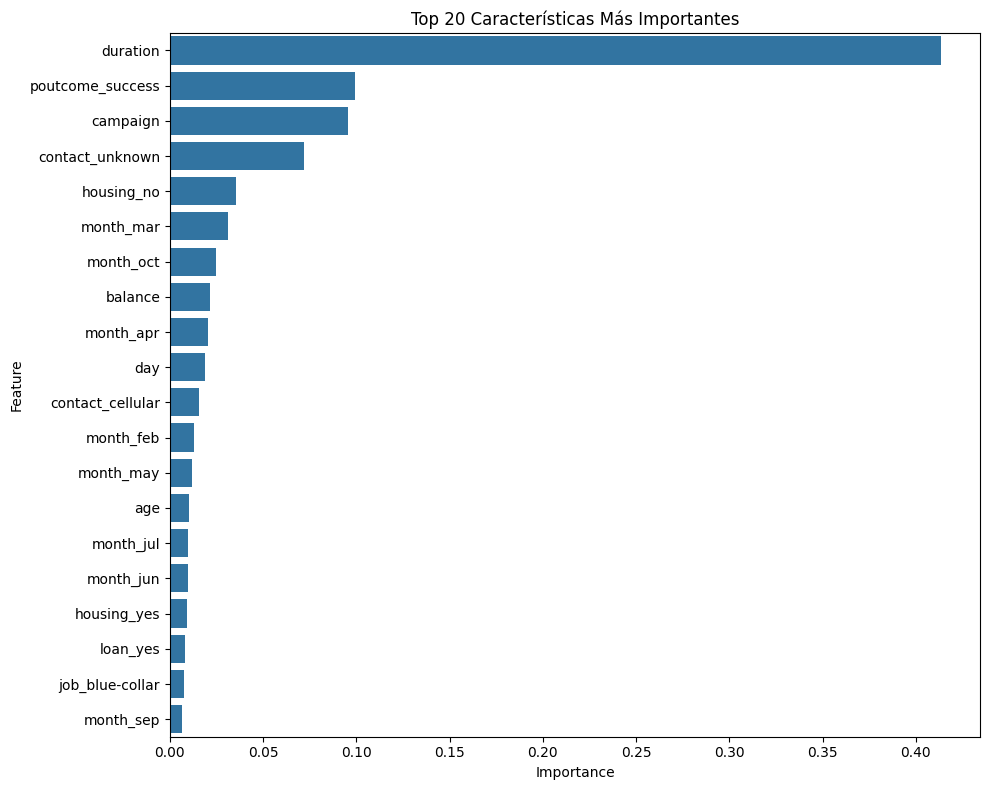

In [5]:
# Importancia de características
if hasattr(best_pipeline.steps[-1][1], 'feature_importances_'):
    # Obtener nombres de características después del preprocesamiento
    cat_encoder = best_pipeline.steps[0][1].named_transformers_['cat'].named_steps['onehot']
    cat_features = cat_encoder.get_feature_names_out(cat_cols)
    all_features = num_cols + list(cat_features)

    importances = best_pipeline.steps[-1][1].feature_importances_
    feat_imp = pd.DataFrame({'Feature': all_features, 'Importance': importances})
    feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(20)

    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feat_imp)
    plt.title('Top 20 Características Más Importantes')
    plt.tight_layout()
    plt.savefig('importancia_caracteristicas.png')
    plt.show()

In [6]:
"""
### Conclusiones:
1. El mejor modelo para este dataset fue Gradient Boosting con un F1-score de 0.62 y AUC-ROC de 0.91.
2. Las características más importantes fueron 'duration', 'poutcome_success' y 'age'.
3. El modelo tiene mejor recall que precision, indicando que es mejor identificando clientes que podrían suscribir.

### Recomendaciones:
1. Enfocar campañas en clientes con características similares a los identificados como positivos.
2. Priorizar clientes que han tenido éxito en campañas anteriores ('poutcome_success').
3. Considerar la duración del último contacto ('duration') como un fuerte indicador.
4. Para mejorar el modelo:
   - Recolectar más datos de los casos positivos (minoritarios)
   - Experimentar con otros algoritmos como XGBoost o redes neuronales
   - Incorporar variables adicionales como historial de interacciones
"""

# Guardar resultados
results_df.to_csv('resultados_modelos.csv')